# In Excel converted "Type " to catogorical values:
like:
    
   'CASH_IN' -1
   
   ' CASH_OUT' -2
   
   ' DEBIT'-3
   
   ' PAYMENT'-4
   
   'TRANSFER'-5
   
 using =IF(B2="PAYMENT",1,IF(B2="TRANSFER",2,IF(B2="DEBIT",3,IF(B2="CASH_IN",4,IF(B2="CASH_OUT",5,6)))))

1. Data cleaning including missing values, outliers and multi-collinearity.


Data cleaning is an important step in any data analysis project. It involves identifying and correcting errors 
in the data such as missing values, outliers and multi-collinearity. 
This step is important because it ensures that the data is accurate and reliable.

2. Describe your fraud detection model in elaboration. 


Fraud detection models are designed to identify fraudulent transactions or activities. There are many different types 
of fraud detection models, but they all work by analyzing data to identify patterns that are indicative of fraud.
The model can then use these patterns to flag potentially fraudulent transactions for further investigation.

3. How did you select variables to be included in the model?


The variables that are included in a fraud detection model will depend on the specific model being used and the data 
that is available. In general, variables that are highly correlated with fraudulent activity will be included in the model.

4. Demonstrate the performance of the model by using best set of tools. 


There are many different tools that can be used to demonstrate the performance of a fraud detection model.
Some common tools include ROC curves, confusion matrices, and precision-recall curves.

5. What are the key factors that predict fraudulent customer? 


The key factors that predict fraudulent customer will depend on the specific data being analyzed.
However, some common factors that are often used in fraud detection models include transaction amount, 
transaction frequency, and geographic location.

6. Do these factors make sense? If yes, How? If not, How not? 


Whether or not the factors used in a fraud detection model make sense will depend on the specific data 
being analyzed and the context of the analysis. In general, factors that are highly correlated with fraudulent 
activity will be included in the model.

7. What kind of prevention should be adopted while company update its infrastructure?


There are many different prevention strategies that can be adopted to prevent fraud. Some common strategies 
include implementing strong authentication measures, monitoring transactions for suspicious activity, and educating c
ustomers about how to protect themselves from fraud.

8. Assuming these actions have been implemented, how would you determine if they work

The effectiveness of fraud prevention strategies can be evaluated by monitoring key metrics such as the number 
of fraudulent transactions detected and prevented over time.

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import re
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
# Model training libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# For checking acuracy
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss

In [49]:
traindata=pd.read_csv("C:/Users/ASU/Desktop/New folder/Fraud.csv")

In [50]:
traindata.head(10)

,step,type,Catogorical_type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,2,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,5,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,1,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,1,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,1,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,1,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,3,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


EDA

In [51]:
#we dont want null value in dataset 
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   step              1048575 non-null  int64  
 1   type              1048575 non-null  object 
 2   Catogorical_type  1048575 non-null  int64  
 3   amount            1048575 non-null  float64
 4   nameOrig          1048575 non-null  object 
 5   oldbalanceOrg     1048575 non-null  float64
 6   newbalanceOrig    1048575 non-null  float64
 7   nameDest          1048575 non-null  object 
 8   oldbalanceDest    1048575 non-null  float64
 9   newbalanceDest    1048575 non-null  float64
 10  isFraud           1048575 non-null  int64  
 11  isFlaggedFraud    1048575 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 96.0+ MB


In [52]:
#So very thing is not null
traindata.nunique().count()

12

In [53]:
traindata.shape

(1048575, 12)

In [54]:
#Data Types
traindata.dtypes

step                  int64
type                 object
Catogorical_type      int64
amount              float64
nameOrig             object
oldbalanceOrg       float64
newbalanceOrig      float64
nameDest             object
oldbalanceDest      float64
newbalanceDest      float64
isFraud               int64
isFlaggedFraud        int64
dtype: object

In [55]:
traindata.count()

step                1048575
type                1048575
Catogorical_type    1048575
amount              1048575
nameOrig            1048575
oldbalanceOrg       1048575
newbalanceOrig      1048575
nameDest            1048575
oldbalanceDest      1048575
newbalanceDest      1048575
isFraud             1048575
isFlaggedFraud      1048575
dtype: int64

In [56]:
#Investigate all the elements with each data feature
#unique vqlues can be string numeric or so on

for coloums in traindata:
    try:
        unique_values=np.unique(traindata[coloums])
    except:
        unique_values=traindata[coloums].unique()
    nr_values=len(unique_values)
    if nr_values<10:
        print('The number of values for features  {}  : {} ----  {}'.format(coloums.upper(),nr_values,unique_values))
    else:
        print('The number of values for features {}  : {} '.format(coloums.upper(),nr_values))

The number of values for features STEP  : 95 
The number of values for features  TYPE  : 5 ----  ['CASH_IN' 'CASH_OUT' 'DEBIT' 'PAYMENT' 'TRANSFER']
The number of values for features  CATOGORICAL_TYPE  : 5 ----  [1 2 3 4 5]
The number of values for features AMOUNT  : 1009606 
The number of values for features NAMEORIG  : 1048317 
The number of values for features OLDBALANCEORG  : 391033 
The number of values for features NEWBALANCEORIG  : 440792 
The number of values for features NAMEDEST  : 449635 
The number of values for features OLDBALANCEDEST  : 590110 
The number of values for features NEWBALANCEDEST  : 437054 
The number of values for features  ISFRAUD  : 2 ----  [0 1]
The number of values for features  ISFLAGGEDFRAUD  : 1 ----  [0]


Missing Data As models cannot take in null values, it is important to check for and handle missing data before modeling.

In [57]:
# Checking for missing data
traindata.isnull().sum()

step                0
type                0
Catogorical_type    0
amount              0
nameOrig            0
oldbalanceOrg       0
newbalanceOrig      0
nameDest            0
oldbalanceDest      0
newbalanceDest      0
isFraud             0
isFlaggedFraud      0
dtype: int64


"" we do not expect any duplicates. However, it is good practice to ensure our dataset does not contain duplicates.

In [58]:

# Checking for duplicates: 
traindata[traindata.duplicated(keep='first')]

,step,type,Catogorical_type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


hence,Our dataset No contains duplicates. 

In [59]:
print('Data does not have any NULL value.')
traindata.isnull().any()

Data does not have any NULL value.


step                False
type                False
Catogorical_type    False
amount              False
nameOrig            False
oldbalanceOrg       False
newbalanceOrig      False
nameDest            False
oldbalanceDest      False
newbalanceDest      False
isFraud             False
isFlaggedFraud      False
dtype: bool

Visualization

In [60]:
traindata[traindata['isFraud']==1]

,step,type,Catogorical_type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,2,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,5,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,5,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,2,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1047888,95,CASH_OUT,5,56745.14,C526144262,56745.14,0.0,C79051264,51433.88,108179.02,1,0
1048221,95,TRANSFER,2,33676.59,C732111322,33676.59,0.0,C1140210295,0.00,0.00,1,0
1048222,95,CASH_OUT,5,33676.59,C1000086512,33676.59,0.0,C1759363094,0.00,33676.59,1,0
1048323,95,TRANSFER,2,87999.25,C927181710,87999.25,0.0,C757947873,0.00,0.00,1,0


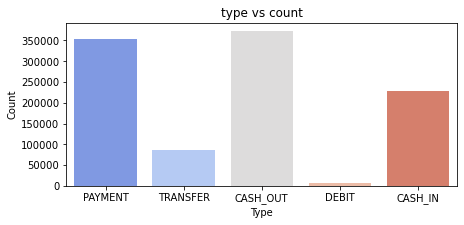

In [61]:
plt.figure(figsize=(7,3))
plt.title('type vs count')
sns.countplot(data=traindata,x='type',palette='coolwarm')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

C:\Users\ASU\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASU\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


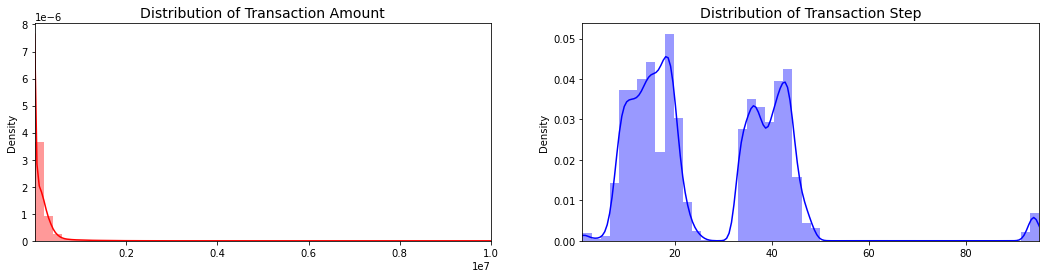

In [62]:
# Plotting subplot for amount and time column 
fig, ax = plt.subplots(1, 2, figsize=(18,4))
amount_val = traindata['amount'].values
time_val = traindata['step'].values
Catogorical_type=traindata['Catogorical_type']

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Step', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])


plt.show()

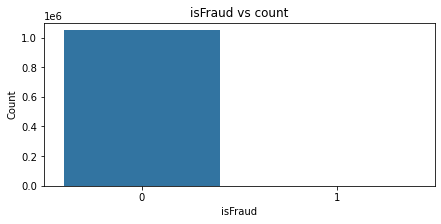

In [63]:
# Countplot of 'isFraud'
plt.figure(figsize=(7,3))
plt.title('isFraud vs count')
sns.countplot(data=traindata,x='isFraud')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.show()

Note : We can see from above visualization it is an imbalanced dataset 

In [64]:
traindata['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [65]:
# Let's look at the percentage of each category in isFraud column(target column)
print("No Frauds:",traindata['isFraud'].value_counts()[0]/len(traindata['isFraud'])*100)
print("Frauds:",traindata['isFraud'].value_counts()[1]/len(traindata['isFraud'])*100)

No Frauds: 99.89109028920201
Frauds: 0.10890971079798775


In [66]:
numerical_dataset=['step','Catogorical_type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']


In [67]:
numerical_dataset

['step',
 'Catogorical_type',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest']

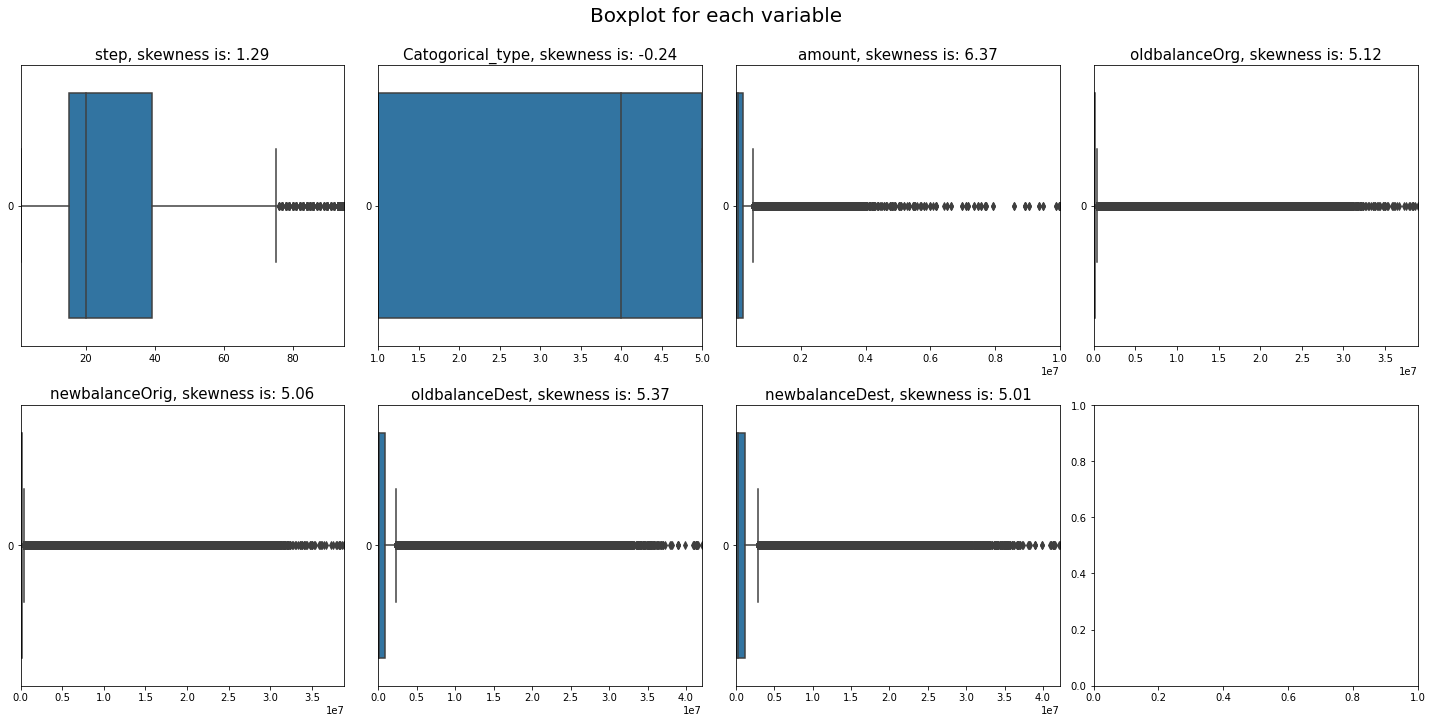

In [68]:
# Boxplot for each variable in numerical list
def boxplots_visual(data,column):
    fig, ax = plt.subplots(2,4,figsize=(20,10))
    fig.suptitle('Boxplot for each variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.boxplot(data=data[feature],ax=ax[i], orient='h')
        ax[i].set_title(feature+ ', skewness is: '+str(round(data[feature].skew(axis = 0, skipna = True),2)),fontsize=15)
        ax[i].set_xlim([min(data[feature]), max(data[feature])])
boxplots_visual(data=traindata,column=numerical_dataset)
plt.tight_layout()

In [69]:
# Checking nameOrig,nameDest column
nameOrig=traindata['nameOrig'].unique()
print("Unique in nameOrig:",len(nameOrig))
print(nameOrig)

nameDest=traindata['nameDest'].unique()
print("Unique in nameDest:",len(nameDest))
print(nameDest)

Unique in nameOrig: 1048317
['C1231006815' 'C1666544295' 'C1305486145' ... 'C2037964975' 'C1633237354'
 'C1264356443']
Unique in nameDest: 449635
['M1979787155' 'M2044282225' 'C553264065' ... 'M1355182933' 'M1964992463'
 'M677577406']


In [70]:
# Checking isFlaggedFraud column
traindata['isFlaggedFraud'].value_counts()

0    1048575
Name: isFlaggedFraud, dtype: int64

In [71]:
 # Dropping columns that are not needed
traindata.drop(['type','nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [72]:
# Applying onehot encoding on type column
df=pd.get_dummies(data=traindata,columns=['Catogorical_type'],drop_first=True)
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,Catogorical_type_2,Catogorical_type_3,Catogorical_type_4,Catogorical_type_5
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,1,1,0,0,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0,0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,0


In [73]:
# Preprocessing Libraries
from sklearn.preprocessing import RobustScaler

In [74]:
# We are using RobustScaler to scale down the numerical features as RobustScaler is less prone to outliers
scale=RobustScaler()
for feature in numerical_dataset:
    traindata[feature]=scale.fit_transform(traindata[feature].values.reshape(-1, 1))
traindata.head()

,step,Catogorical_type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,-0.791667,-0.75,-0.329858,1.128013,0.918078,-0.137978,-0.189823,0
1,-0.791667,-0.75,-0.369416,0.038400,0.111024,-0.137978,-0.189823,0
2,-0.791667,-0.50,-0.377765,-0.115784,0.000000,-0.137978,-0.189823,1
3,-0.791667,0.25,-0.377765,-0.115784,0.000000,-0.114852,-0.189823,1
4,-0.791667,-0.75,-0.320789,0.187000,0.171168,-0.137978,-0.189823,0


Model Training

In [75]:
# Splitting our data into independent and dependent features
x=traindata.drop('isFraud',axis=1)
y=traindata['isFraud']

In [76]:
traindata.columns

Index(['step', 'Catogorical_type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [77]:
traindata[traindata['isFraud']==1]

,step,Catogorical_type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,-0.791667,-0.50,-0.377765,-0.115784,0.0,-0.137978,-0.189823,1
3,-0.791667,0.25,-0.377765,-0.115784,0.0,-0.114852,-0.189823,1
251,-0.791667,-0.50,-0.364745,-0.096574,0.0,-0.137978,-0.189823,1
252,-0.791667,0.25,-0.364745,-0.096574,0.0,-0.109371,-0.189823,1
680,-0.791667,-0.50,-0.278828,0.030196,0.0,-0.137978,-0.189823,1
...,...,...,...,...,...,...,...,...
1047888,3.125000,0.25,-0.097207,0.298174,0.0,-0.081823,-0.095739,1
1048221,3.125000,-0.50,-0.211627,0.129350,0.0,-0.137978,-0.189823,1
1048222,3.125000,0.25,-0.211627,0.129350,0.0,-0.137978,-0.160534,1
1048323,3.125000,-0.50,0.057813,0.526904,0.0,-0.137978,-0.189823,1


In [78]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)

[0.39769104 0.06198299 0.13571059 0.18900813 0.03178814 0.06228569
 0.12153342]


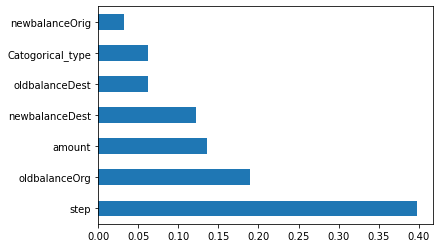

In [79]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [80]:
# Doing train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.7)
# Applying StratifiedKFold
skf=StratifiedKFold(n_splits=3, shuffle=False, random_state=None)

In [81]:
model1=LogisticRegression()
param={'C':10.0 **np.arange(-1,2)}
lrs=RandomizedSearchCV(model1,param,cv=skf,n_jobs=-1,scoring='accuracy')
lrs.fit(X_train,y_train)

C:\Users\ASU\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                   estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([ 0.1,  1. , 10. ])},
                   scoring='accuracy')

In [82]:
y_pred=lrs.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[314211      8]
 [   216    138]]
0.9992879236298093
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314219
           1       0.95      0.39      0.55       354

    accuracy                           1.00    314573
   macro avg       0.97      0.69      0.78    314573
weighted avg       1.00      1.00      1.00    314573

